<a href="https://colab.research.google.com/github/SrijaG29/Spotify_df-visualization/blob/main/Spotify_Dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'most-streamed-spotify-songs-2024:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5218014%2F8700156%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240716%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240716T061937Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D087938a3b2ef8e6562e4c40220b298058368c196182d469db9b7aa9f7365beb7937d17a2272ae3c762ecbb8ae42af776707f28f1fd370bb72909b69024ec30e4bfa7c12d94bd97392a3c859c34d919399836b8939a1b277bf342af59275ee740061b99bcdc283b9ebf14afb7a6ac268b84501e04d506ff9d884eeace78df0e8bbb94a7e20ffd415f150910df5a5709572af428d283c56ee385abfe676fb504ffd04ddd7b93d5349aab6702edf242ef2f23b19fd638e0a8bff2dff9a8d02b1c65f516b65c9b3fdd21973fd225babaf04e9eb6080c2c2132015656b11c823545b19a3cc4d4dd0b1ab3272a2a9ebd7770299ce295936e0b29a66b75cc62244bb9c8'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 508134 bytes downloaded
Downloaded and uncompressed: most-streamed-spotify-songs-2024
Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/most-streamed-spotify-songs-2024/Most Streamed Spotify Songs 2024.csv


In [4]:
spotify_df = pd.read_csv('/kaggle/input/most-streamed-spotify-songs-2024/Most Streamed Spotify Songs 2024.csv',encoding="ISO-8859-1")
spotify_df

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


In [5]:
spotify_df.dtypes

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams             object
Shazam Count

**Data Manipulation**

Columns required are

1.Track                          
2.Album Name                     
3.Artist                         
4.Release Date                   
5.ISRC
6.All Time Rank                  
7.Track Score                   
8.Spotify Streams                
9.Spotify Playlist Count         
10.Spotify Playlist Reach         
11.Spotify Popularity            
12.YouTube Views                  
13.YouTube Likes                  
14.YouTube Playlist Reach         
15.Explicit Track                  

Now we are removing not required columns.


In [6]:
columns_to_remove = ["TikTok Posts","TikTok Likes","TikTok Views","Apple Music Playlist Count",
                    "AirPlay Spins","SiriusXM Spins","Deezer Playlist Count","Deezer Playlist Reach",
                    "Amazon Playlist Count","Pandora Streams","Pandora Track Stations",
                    "Soundcloud Streams","Shazam Counts","TIDAL Popularity"]
spotify_df = spotify_df.drop(columns=columns_to_remove)
spotify_df

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,YouTube Playlist Reach,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","150,597,040",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","156,380,351",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","373,784,955",0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","3,351,188,582",0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","112,763,851",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",71.0,"149,247,747","1,397,590","53,016",1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",56.0,"943,920,245","5,347,766","24,973,048",0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",65.0,"201,027,333","1,081,402","29,253,152",1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",66.0,"1,118,595,159","3,868,828","25,150,516",0


In [7]:
spotify_df = spotify_df.drop(columns="Spotify Playlist Reach")
spotify_df

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Popularity,YouTube Views,YouTube Likes,YouTube Playlist Reach,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716",92.0,"84,274,754","1,713,126","150,597,040",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113",92.0,"116,347,040","3,486,739","156,380,351",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331",92.0,"122,599,116","2,228,730","373,784,955",0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802",85.0,"1,096,100,899","10,629,796","3,351,188,582",0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223",88.0,"77,373,957","3,670,188","112,763,851",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770",71.0,"149,247,747","1,397,590","53,016",1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602",56.0,"943,920,245","5,347,766","24,973,048",0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066",65.0,"201,027,333","1,081,402","29,253,152",1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037",66.0,"1,118,595,159","3,868,828","25,150,516",0


Checking the no of null values in each column.

In [8]:
spotify_df.isna().sum()

Track                        0
Album Name                   0
Artist                       5
Release Date                 0
ISRC                         0
All Time Rank                0
Track Score                  0
Spotify Streams            113
Spotify Playlist Count      70
Spotify Popularity         804
YouTube Views              308
YouTube Likes              315
YouTube Playlist Reach    1009
Explicit Track               0
dtype: int64

Removing the rows that have null values in artist column.

In [9]:
spotify_df = spotify_df.dropna(subset = "Artist")
spotify_df

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Popularity,YouTube Views,YouTube Likes,YouTube Playlist Reach,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716",92.0,"84,274,754","1,713,126","150,597,040",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113",92.0,"116,347,040","3,486,739","156,380,351",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331",92.0,"122,599,116","2,228,730","373,784,955",0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802",85.0,"1,096,100,899","10,629,796","3,351,188,582",0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223",88.0,"77,373,957","3,670,188","112,763,851",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770",71.0,"149,247,747","1,397,590","53,016",1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602",56.0,"943,920,245","5,347,766","24,973,048",0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066",65.0,"201,027,333","1,081,402","29,253,152",1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037",66.0,"1,118,595,159","3,868,828","25,150,516",0


replacing null values of Spotify Stream and Spotify Popularity woth "0".

In [10]:
spotify_df["Spotify Streams"] = spotify_df["Spotify Streams"].fillna('0')
spotify_df["Spotify Streams"].isna().sum()

# spotify_df.loc[(spotify_df["Spotify Streams"].isna()),'Spotify Streams']


<ipython-input-10-059bc79b33c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df["Spotify Streams"] = spotify_df["Spotify Streams"].fillna('0')


0

In [11]:
spotify_df["Spotify Popularity"] = spotify_df["Spotify Popularity"].fillna(float(0))
spotify_df["Spotify Popularity"].isna().sum()


<ipython-input-11-b32dc2a22af3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df["Spotify Popularity"] = spotify_df["Spotify Popularity"].fillna(float(0))


0

Converting "Spotify Streams" column datatype from object to int. for that 1st i need to remove commas.

In [12]:
x = spotify_df["Spotify Streams"].str.replace(',','')
spotify_df["Spotify Streams"] = x.astype("int64")
spotify_df["Spotify Streams"].dtype

<ipython-input-12-8c0f95a44718>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df["Spotify Streams"] = x.astype("int64")


dtype('int64')

In [13]:
spotify_df[(spotify_df["Spotify Popularity"] != 0) & (spotify_df["Spotify Streams"]==0)]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Popularity,YouTube Views,YouTube Likes,YouTube Playlist Reach,Explicit Track
60,Stereo Love - Melodic,Stereo Love Deluxe (feat. Vika Jigulina),Edward Maya,6/5/2024,ROCMA2413380,61,187.9,0,2,9.0,NaN,NaN,NaN,0
254,Dog's Plan,Thoughts Feelings,David Jackson,3/2/2023,USZXT2350766,255,97.0,0,44,3.0,"1,131,058,312","2,367,298",NaN,0
387,writhe,writhe,daine,2/21/2023,AUWA02201495,386,77.6,0,163,15.0,"915,870,602","2,980,959","26,629,501",0
1163,She Share Story,She Share Story,Shayne Orok,6/2/2020,QZHN52089091,"1,156",44.1,0,"2,443",33.0,"238,798","10,479",NaN,0
1492,Show Time,Show Time,SUPER JUNIOR,6/11/2024,KRA302400197,"1,491",38.0,0,31,39.0,"3,657,483","57,391",NaN,0
1764,See You Dance (Extended Mix),See You Dance (Extended Mix) - Single,DJ Meetch,3/6/2023,QZES52309758,"1,760",34.8,0,1,4.0,"402,618,045","2,927,219","152,211",0
1797,My Baby,My Baby,Diamond Platnumz,2/3/2023,ZA41S2300062,"1,787",34.4,0,757,30.0,"25,504,572","187,689","9,191,413",0
1920,Creeper Star,Creeper Star,Leo Walrus,11/29/2022,GX8MK2200002,"1,915",33.1,0,28,2.0,"445,360,465","369,291",NaN,0
2231,"Mommy, Mommy Give Me Yummy","Mommy, Mommy Give Me Yummy",D Billions,4/20/2021,AEA0Q2102685,"2,209",30.4,0,49,21.0,"833,736,978","1,346,347",NaN,0
2321,Funny Song,Funny Song,Bruno Portinho Trilhas para filmes,3/7/2023,SGB502330766,"2,310",29.8,0,3,2.0,NaN,NaN,NaN,0


In [14]:
spotify_df.loc[(9.0 == spotify_df["Spotify Popularity"]),'Spotify Streams'].mean()

94231007.0

In [15]:
def remove_zero(x):
    if (x["Spotify Streams"] == 0) & (x["Spotify Popularity"] != float(0)):
        x["Spotify Streams"] = int(spotify_df.loc[(x["Spotify Popularity"] == spotify_df["Spotify Popularity"]),'Spotify Streams'].mean())
    return x
spotify_df = spotify_df.apply(remove_zero,axis=1)

# spotify_df[(spotify_df["Spotify Streams"] == 0 )]

replacing null values in spotify playslist count to '0'.

In [16]:
spotify_df["Spotify Playlist Count"] = spotify_df["Spotify Playlist Count"].fillna('0')
spotify_df["Spotify Playlist Count"].isna().sum()
# spotify_df["Spotify Playlist Count"].dtype

0

Converting the datatype of Spotify Playlist Count from object to int64

In [17]:
x = spotify_df["Spotify Playlist Count"].str.replace(',','')
spotify_df["Spotify Playlist Count"] = x.astype("int64")
spotify_df["Spotify Playlist Count"].dtype

dtype('int64')

Converting Release date data type from object to date.

In [18]:
spotify_df["Release Date"] = pd.to_datetime(spotify_df["Release Date"])
spotify_df["Release Date"].dtype

dtype('<M8[ns]')

Converting All Time Rank column datatype from object to int. for that 1st i need to remove commas.

In [19]:
x = spotify_df["All Time Rank"].str.replace(',','')
spotify_df["All Time Rank"] = x.astype("int64")
spotify_df["All Time Rank"].dtype

dtype('int64')

Replacing the null values of the columns YouTube Views,YouTube Likes,YouTube Playlist Reach with '0'.

In [20]:
spotify_df["YouTube Views"] = spotify_df["YouTube Views"].fillna('0')
spotify_df["YouTube Likes"] = spotify_df["YouTube Likes"].fillna('0')
spotify_df["YouTube Playlist Reach"] = spotify_df["YouTube Playlist Reach"].fillna('0')

Converting the datatype of the columns YouTube Views,YouTube Likes,YouTube Playlist Reach from object to int64.

In [21]:
x = spotify_df["YouTube Views"].str.replace(',','')
spotify_df["YouTube Views"] = x.astype("int64")
spotify_df["YouTube Views"].dtype

dtype('int64')

In [22]:
x = spotify_df["YouTube Likes"].str.replace(',','')
spotify_df["YouTube Likes"] = x.astype("int64")
spotify_df["YouTube Likes"].dtype

dtype('int64')

In [23]:
x = spotify_df["YouTube Playlist Reach"].str.replace(',','')
spotify_df["YouTube Playlist Reach"] = x.astype("int64")
spotify_df["YouTube Playlist Reach"].dtype

dtype('int64')

In [24]:
spotify_df.dtypes

Track                             object
Album Name                        object
Artist                            object
Release Date              datetime64[ns]
ISRC                              object
All Time Rank                      int64
Track Score                      float64
Spotify Streams                    int64
Spotify Playlist Count             int64
Spotify Popularity               float64
YouTube Views                      int64
YouTube Likes                      int64
YouTube Playlist Reach             int64
Explicit Track                     int64
dtype: object

In [25]:
spotify_df.isna().sum()

Track                     0
Album Name                0
Artist                    0
Release Date              0
ISRC                      0
All Time Rank             0
Track Score               0
Spotify Streams           0
Spotify Playlist Count    0
Spotify Popularity        0
YouTube Views             0
YouTube Likes             0
YouTube Playlist Reach    0
Explicit Track            0
dtype: int64

In [26]:
spotify_df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Popularity,YouTube Views,YouTube Likes,YouTube Playlist Reach,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,390470936,30716,92.0,84274754,1713126,150597040,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,323703884,28113,92.0,116347040,3486739,156380351,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,601309283,54331,92.0,122599116,2228730,373784955,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2031280633,269802,85.0,1096100899,10629796,3351188582,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,107034922,7223,88.0,77373957,3670188,112763851,1


**Ploting**

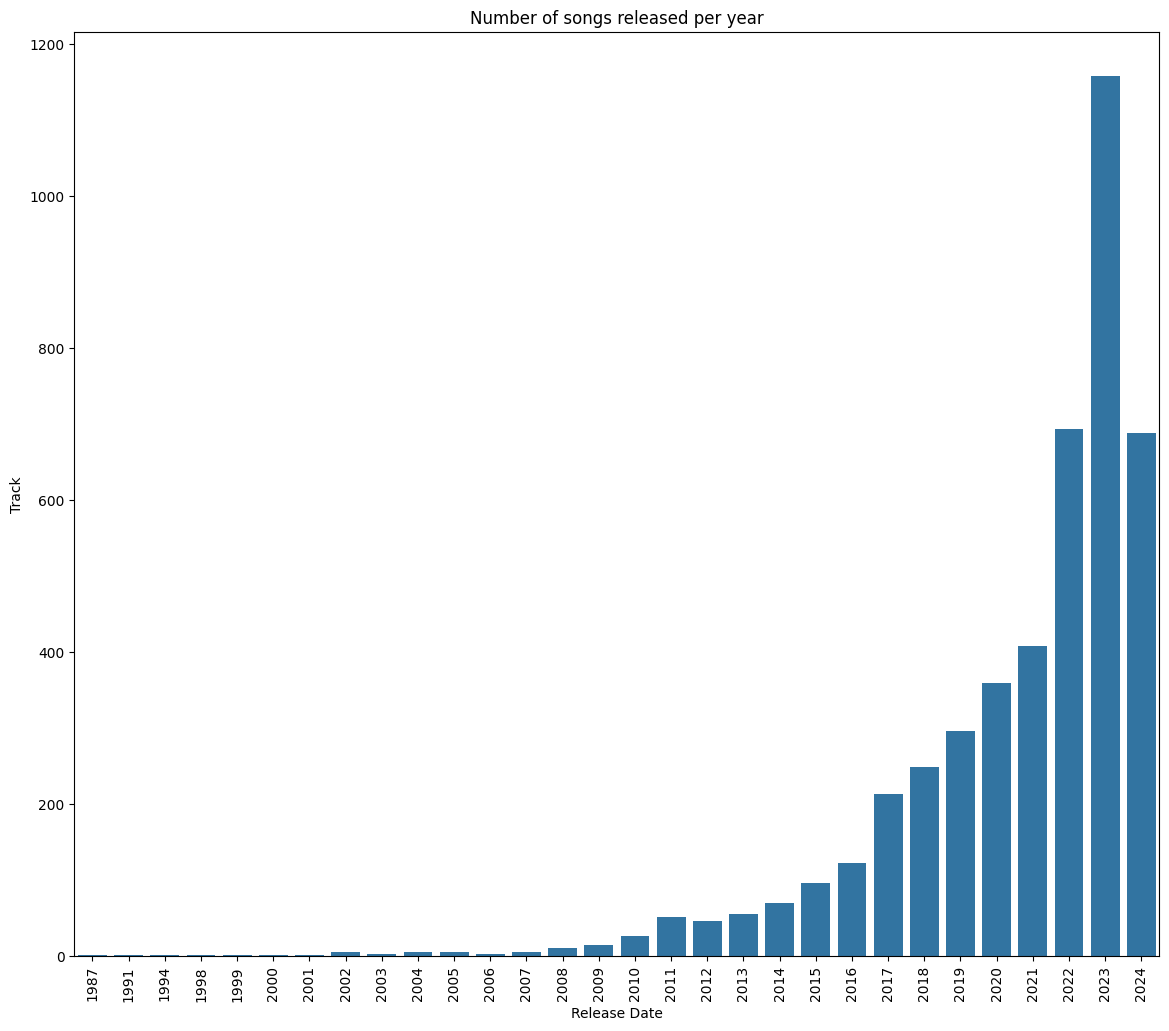

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,12))
sp = spotify_df.copy()
sp['Release Date'] = sp['Release Date'].dt.year

x = sp.groupby('Release Date')['Track'].count().reset_index()
sns.barplot(data = x,x='Release Date',y='Track')
plt.title('Number of songs released per year')
plt.xticks(rotation=90)
plt.show()



**Conclusion 1:**

As year increases the number of tracks released also increased.

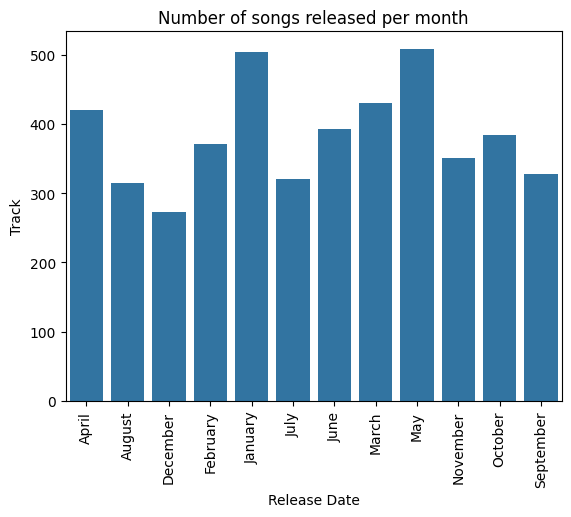

In [28]:
sp = spotify_df.copy()
sp['Release Date']=sp['Release Date'].dt.strftime("%B")
# l = ['January','February','March','April','May','June','July','August','September','October','November','December']
x = sp.groupby('Release Date')['Track'].count().reset_index()
sns.barplot(data = x,x='Release Date',y='Track')
plt.title('Number of songs released per month')
plt.xticks(rotation=90)
plt.show()

**Conclusion 2:** Most Tracks are released in january and may.

In [33]:
f = spotify_df.copy()
f['Country Code'] = f['ISRC'].str[0:2]
# f
x = f['Country Code'].value_counts()
# print(len(x))
x = x.reset_index()
y = x[(x['count']>100)]
y


,Country Code,count
0,US,2255
1,QZ,401
2,QM,369
3,GB,316
4,IN,159
5,FR,119


In [34]:
q = f[(f['Country Code'].isin(y['Country Code']))]
q

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Popularity,YouTube Views,YouTube Likes,YouTube Playlist Reach,Explicit Track,Country Code
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,390470936,30716,92.0,84274754,1713126,150597040,0,QM
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,323703884,28113,92.0,116347040,3486739,156380351,1,US
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,601309283,54331,92.0,122599116,2228730,373784955,0,QZ
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2031280633,269802,85.0,1096100899,10629796,3351188582,0,US
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,107034922,7223,88.0,77373957,3670188,112763851,1,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,4585,19.4,305049963,65770,71.0,149247747,1397590,53016,1,QM
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,4575,19.4,52282360,4602,56.0,943920245,5347766,24973048,0,IN
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,4571,19.4,189972685,72066,65.0,201027333,1081402,29253152,1,US
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,4591,19.4,145467020,14037,66.0,1118595159,3868828,25150516,0,IN


In [35]:
q['Release Date'] = q['Release Date'].dt.strftime("%B")
q['Country Code']

<ipython-input-35-784ad980ae54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q['Release Date'] = q['Release Date'].dt.strftime("%B")


0       QM
1       US
2       QZ
3       US
4       US
        ..
4595    QM
4596    IN
4597    US
4598    IN
4599    US
Name: Country Code, Length: 3619, dtype: object

Text(0.5, 0.98, 'Country wise Track Count')

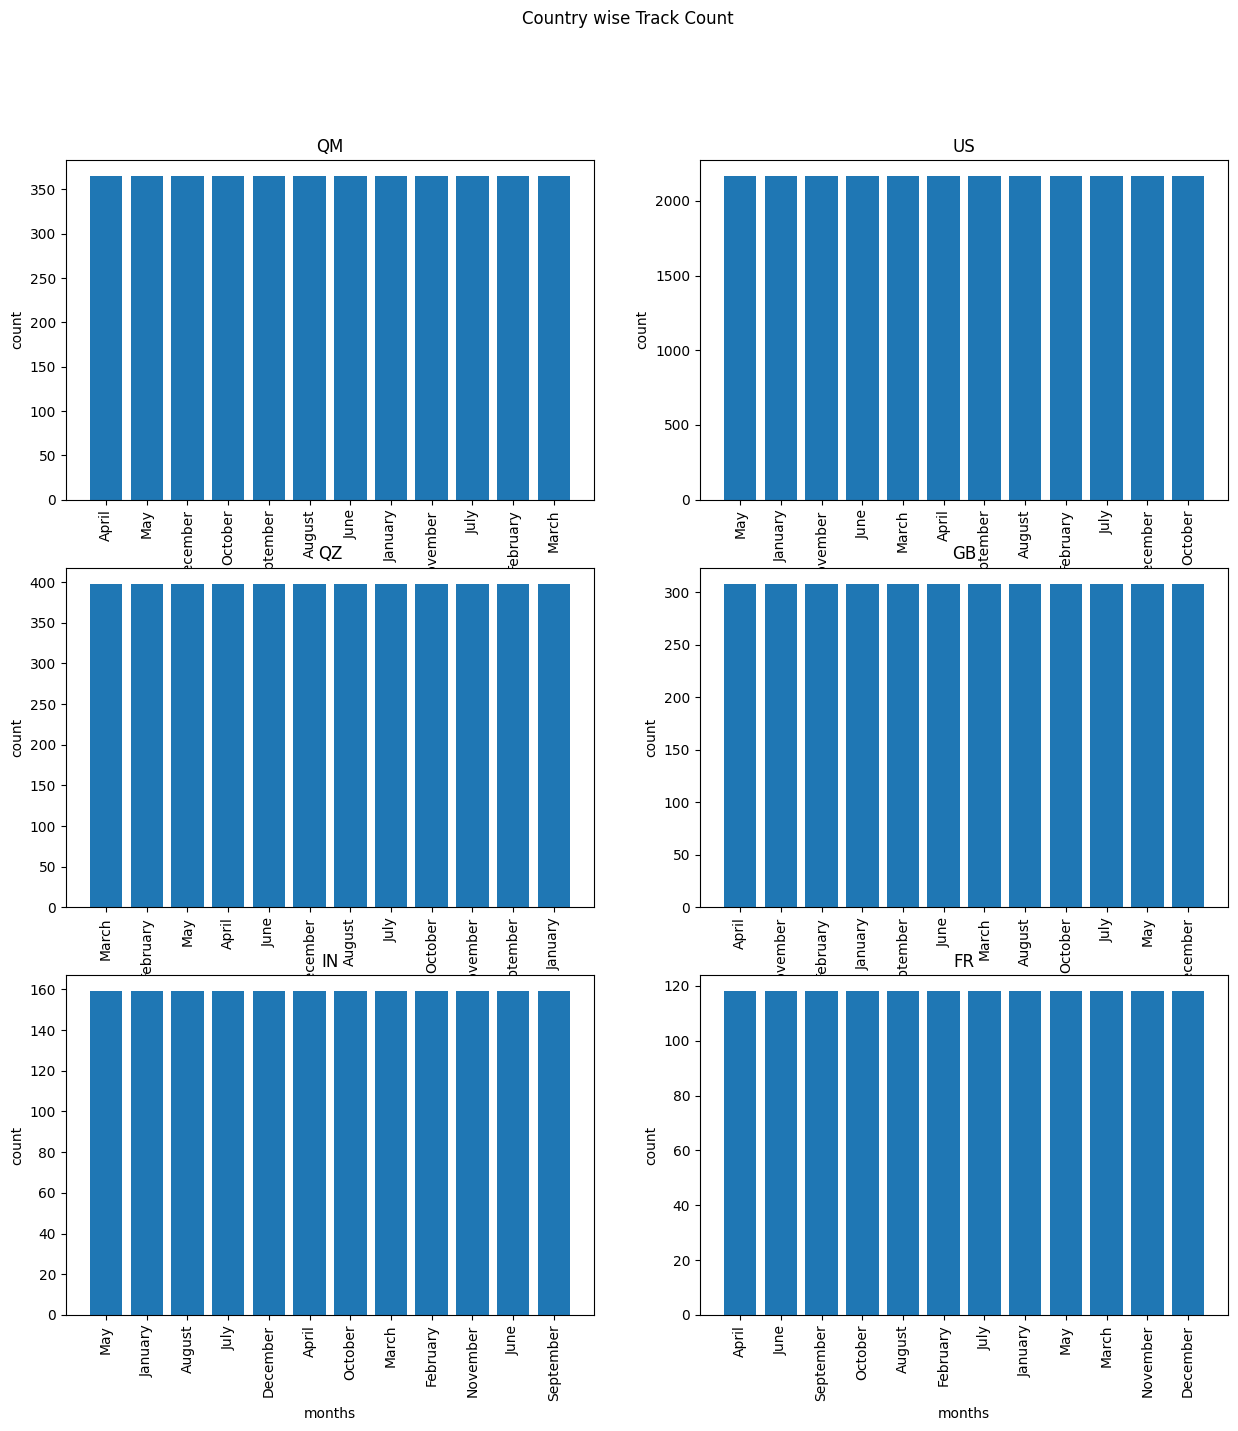

In [36]:
x = q['Country Code'].unique()
fig,axis=plt.subplots(3,2,figsize=(15,15))
a = 0
b = 0
r = 3
c = 2
for i in range(6):
  df = q[(q['Country Code'] == x[i])]
  axis[a,b].bar(df['Release Date'],len(df['Track'].value_counts()))
  axis[a, b].tick_params(axis='x', rotation=90)
  axis[a,b].set_xlabel('months')
  axis[a,b].set_ylabel('count')
  axis[a,b].set_title(x[i])
  if b < c:
    b = b+1
  if b == c:
    b = 0
    a = a+1
fig.suptitle('Country wise Track Count')


In [37]:
r = f[(f['Country Code'].isin(y['Country Code']))]
r['Release Date'] = r['Release Date'].dt.month
r

<ipython-input-37-96ceecc74731>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['Release Date'] = r['Release Date'].dt.month


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Popularity,YouTube Views,YouTube Likes,YouTube Playlist Reach,Explicit Track,Country Code
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4,QM24S2402528,1,725.4,390470936,30716,92.0,84274754,1713126,150597040,0,QM
1,Not Like Us,Not Like Us,Kendrick Lamar,5,USUG12400910,2,545.9,323703884,28113,92.0,116347040,3486739,156380351,1,US
2,i like the way you kiss me,I like the way you kiss me,Artemas,3,QZJ842400387,3,538.4,601309283,54331,92.0,122599116,2228730,373784955,0,QZ
3,Flowers,Flowers - Single,Miley Cyrus,1,USSM12209777,4,444.9,2031280633,269802,85.0,1096100899,10629796,3351188582,0,US
4,Houdini,Houdini,Eminem,5,USUG12403398,5,423.3,107034922,7223,88.0,77373957,3670188,112763851,1,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9,QM8DG1703420,4585,19.4,305049963,65770,71.0,149247747,1397590,53016,1,QM
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7,INT101800122,4575,19.4,52282360,4602,56.0,943920245,5347766,24973048,0,IN
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2,USUG12000043,4571,19.4,189972685,72066,65.0,201027333,1081402,29253152,1,US
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11,INY091600067,4591,19.4,145467020,14037,66.0,1118595159,3868828,25150516,0,IN


<Axes: xlabel='Release Date', ylabel='Track Score'>

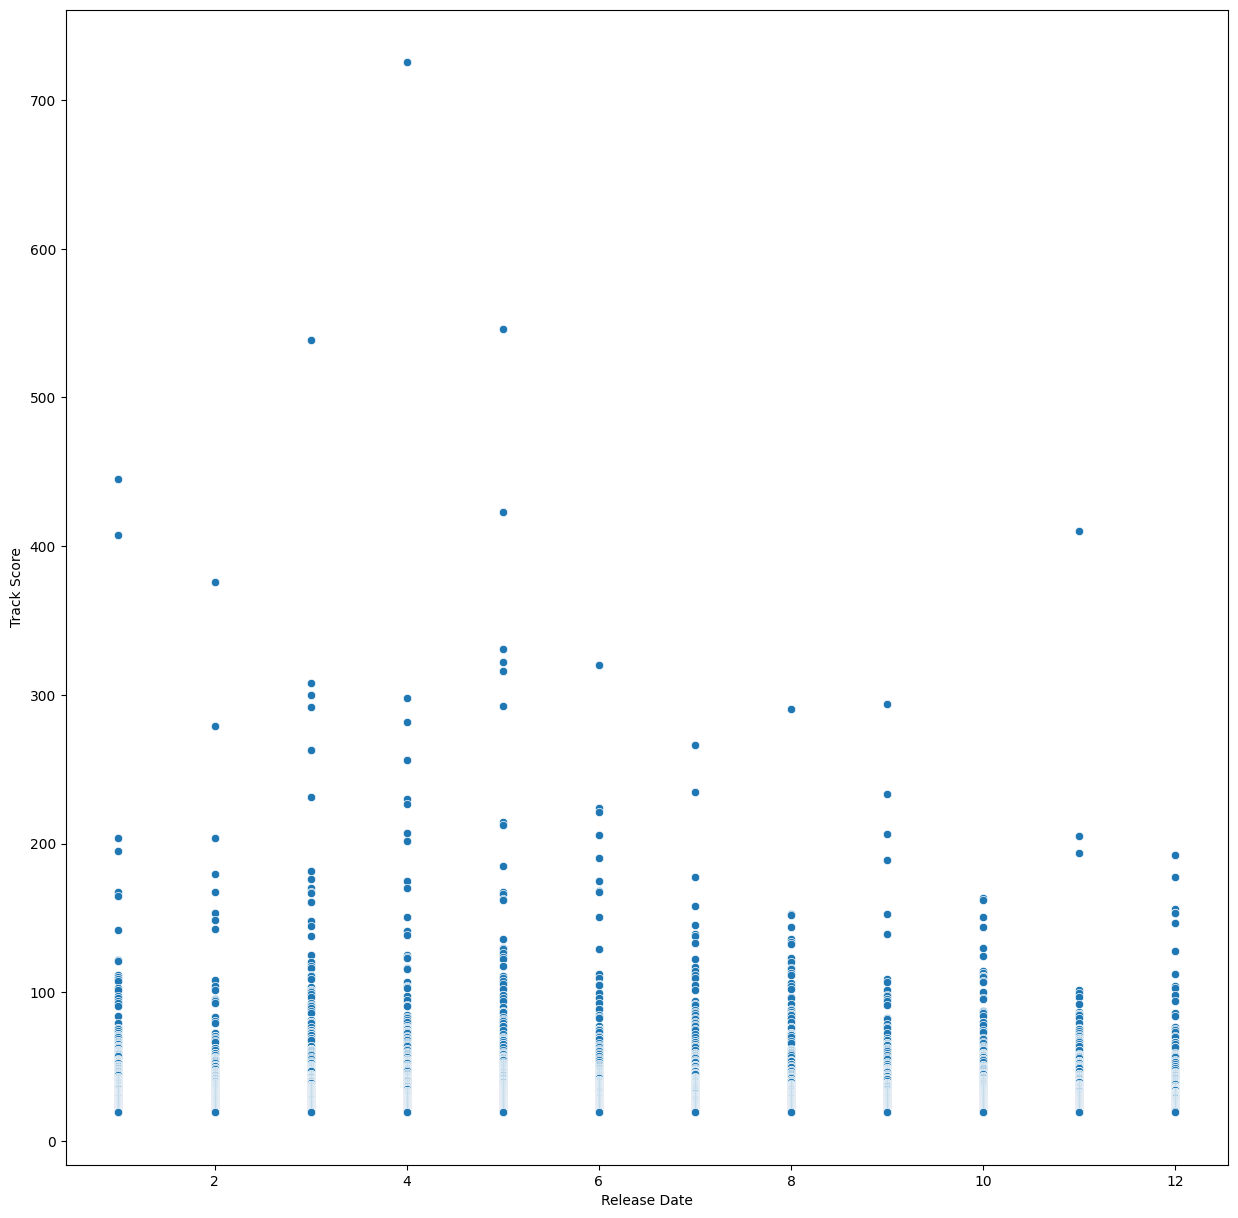

In [38]:
plt.figure(figsize = (15,15))
sns.scatterplot(data = r , x = 'Release Date',y = 'Track Score')

**Heat Map**

In [39]:
spotify_df.dtypes

Track                             object
Album Name                        object
Artist                            object
Release Date              datetime64[ns]
ISRC                              object
All Time Rank                      int64
Track Score                      float64
Spotify Streams                    int64
Spotify Playlist Count             int64
Spotify Popularity               float64
YouTube Views                      int64
YouTube Likes                      int64
YouTube Playlist Reach             int64
Explicit Track                     int64
dtype: object

In [44]:
from sklearn.preprocessing import LabelEncoder

In [49]:
label_encoder={}
heat_map = spotify_df.copy()
heat_map

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Popularity,YouTube Views,YouTube Likes,YouTube Playlist Reach,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,390470936,30716,92.0,84274754,1713126,150597040,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,323703884,28113,92.0,116347040,3486739,156380351,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,601309283,54331,92.0,122599116,2228730,373784955,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2031280633,269802,85.0,1096100899,10629796,3351188582,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,107034922,7223,88.0,77373957,3670188,112763851,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,4585,19.4,305049963,65770,71.0,149247747,1397590,53016,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,4575,19.4,52282360,4602,56.0,943920245,5347766,24973048,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,4571,19.4,189972685,72066,65.0,201027333,1081402,29253152,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,4591,19.4,145467020,14037,66.0,1118595159,3868828,25150516,0


In order to perform heatmap we need to convert all the columns values into numbers.So the columns on which we need to performe label encoding are:

Track                             
Album Name                        
Artist                            
ISRC                              

In [50]:
label_encoder['Track'] = LabelEncoder()
heat_map['Track'] = label_encoder['Track'].fit_transform(heat_map['Track'])
label_encoder['Album Name'] = LabelEncoder()
heat_map['Album Name'] = label_encoder['Album Name'].fit_transform(heat_map['Album Name'])
label_encoder['Artist'] = LabelEncoder()
heat_map['Artist'] = label_encoder['Artist'].fit_transform(heat_map['Artist'])
label_encoder['ISRC'] = LabelEncoder()
heat_map['ISRC'] = label_encoder['ISRC'].fit_transform(heat_map['ISRC'])
heat_map

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Popularity,YouTube Views,YouTube Likes,YouTube Playlist Reach,Explicit Track
0,2188,2169,1754,2024-04-26,1305,1,725.4,390470936,30716,92.0,84274754,1713126,150597040,0
1,2554,2384,953,2024-05-04,3745,2,545.9,323703884,28113,92.0,116347040,3486739,156380351,1
2,4224,1579,136,2024-03-19,1845,3,538.4,601309283,54331,92.0,122599116,2228730,373784955,0
3,1277,1217,1234,2023-01-12,3372,4,444.9,2031280633,269802,85.0,1096100899,10629796,3351188582,0
4,1602,1516,576,2024-05-31,3790,5,423.3,107034922,7223,88.0,77373957,3670188,112763851,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,1287,1230,2,2017-09-05,1481,4585,19.4,305049963,65770,71.0,149247747,1397590,53016,1
4596,968,919,142,2018-07-27,957,4575,19.4,52282360,4602,56.0,943920245,5347766,24973048,0
4597,1443,2255,1055,2020-02-28,3521,4571,19.4,189972685,72066,65.0,201027333,1081402,29253152,1
4598,2456,2393,131,2016-11-08,991,4591,19.4,145467020,14037,66.0,1118595159,3868828,25150516,0


In [51]:
heat_map_matrix = heat_map.corr()

<Axes: >

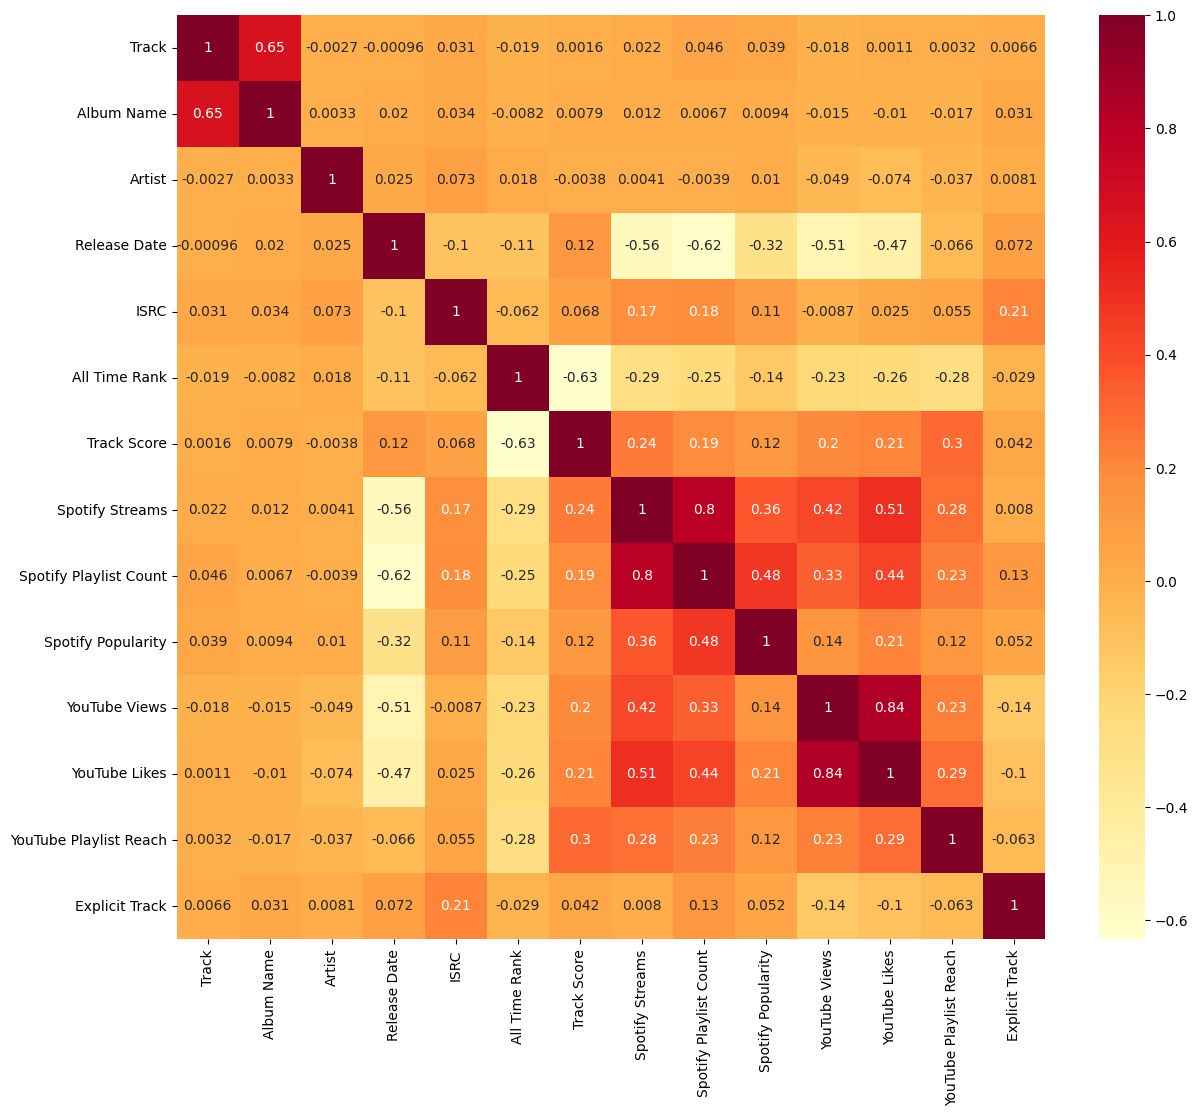

In [55]:
plt.figure(figsize = (14,12))
sns.heatmap(heat_map_matrix,annot=True,cmap='YlOrRd')